In [118]:
import psycopg2
import psycopg2.extras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import figure
import dataframe_image as dfi

In [119]:
connection = psycopg2.connect(
    database="postgres",
    user="postgres",
    password="password",
    host="127.0.0.1",
    port="5432"
)
db = connection.cursor(cursor_factory=psycopg2.extras.RealDictCursor)


In [120]:
def getAll(query):
    db.execute(query)
    return pd.DataFrame(data=db.fetchall())

def plot(xs, ys, xlabel, ylabel, tittle, file_name, step=1, color="blue"):
    plt.figure(figsize=(12, 10))
    plt.grid(linestyle='-', linewidth=1)
    plt.plot(xs, ys, linestyle='--')
    plt.scatter(xs, ys)
    plt.style.use('ggplot')
    plt.ylim(0)
    plt.ylabel(ylabel, size=14)
    plt.xlabel(xlabel, size=14)
    plt.title(tittle, size=16)
    ax = plt.gca()
    plt.xticks(xs, rotation=60)
    ax.set_xticks(xs[::step])
    plt.savefig(f'mixed/{file_name}')
    plt.show()

In [121]:
#  ilosc wszystkich tweetow

sql1 = """
select count(*) as "Ilość wszystkich tweetów znajdujących się w bazie danych"
from tweet t
where t.type = 1;

"""

df1 = getAll(sql1)
# dfi.export(df1,"images/ilosc-wszystkich-tweetow.png")
df1


,Ilość wszystkich tweetów znajdujących się w bazie danych
0,1808498


In [122]:
#  ilosc wszystkich komentarzy

sql1 = """
select count(*) as "Ilość wszystkich komentarzy znajdujących się w bazie danych"
from tweet t
where t.type = 2;

"""

df1 = getAll(sql1)
# dfi.export(df1,"images/ilosc-wszystkich-komentarzy.png")
df1


,Ilość wszystkich komentarzy znajdujących się w bazie danych
0,173285


In [123]:
#  ilosc wszystkich cytowan

sql1 = """
select count(*) as "Ilość wszystkich cytowań znajdujących się w bazie danych"
from tweet t
where t.type = 3;

"""

df1 = getAll(sql1)
# dfi.export(df1,"images/ilosc-wszystkich-cytowan.png")
df1


,Ilość wszystkich cytowań znajdujących się w bazie danych
0,53103


In [124]:
#  ilosc wszystkich retweetow

sql1 = """
select count(*) as "Ilość wszystkich retweetów znajdujących się w bazie danych"
from retweet;

"""

df1 = getAll(sql1)
# dfi.export(df1,"images/ilosc-wszystkich-retweetow.png")
df1


,Ilość wszystkich retweetów znajdujących się w bazie danych
0,149315


In [125]:
#  ilosc wszystkich polubien

sql1 = """
select sum(t.favorite_count) as "Ilość wszystkich polubień"
from tweet t;


"""

df1 = getAll(sql1)
# dfi.export(df1,"images/ilosc-wszystkich-polubien.png")
df1


,Ilość wszystkich polubień
0,1145344851


In [126]:
#  srednia ilosc komentarzy per tweet

sql1 = """
select ROUND(AVG(t.reply_count)::numeric, 2) as "Średnia ilość komentarzy na tweet"
from tweet t
where t.type = 1;
"""

df1 = getAll(sql1)
# dfi.export(df1,"images/srednia-ilosc-komentarzy-per-tweet.png")
df1


,Średnia ilość komentarzy na tweet
0,37.56


In [127]:
#  srednia ilosc retweetow per tweet

sql1 = """
select ROUND(AVG(t.retweet_count)::numeric, 2) as "Średnia ilość retweetów na tweet"
from tweet t
where t.type = 1;
"""

df1 = getAll(sql1)
# dfi.export(df1,"images/srednia-ilosc-retweetow-per-tweet.png")
df1


,Średnia ilość retweetów na tweet
0,139.57


In [128]:
#  srednia ilosc polubien per tweet

sql1 = """
select ROUND(AVG(t.favorite_count)::numeric, 2) as "Średnia ilość polubień na tweet"
from tweet t
where t.type = 1;
"""

df1 = getAll(sql1)
# dfi.export(df1,"images/srednia-ilosc-polubien-per-tweet.png")
df1


,Średnia ilość polubień na tweet
0,619.24


In [129]:
#  srednia ilosc cytowan per tweet

sql1 = """
select ROUND(AVG(t.quote_count)::numeric, 2) as "Średnia ilość cytowań na tweet"
from tweet t
where t.type = 1;

"""

df1 = getAll(sql1)
# dfi.export(df1,"images/srednia-ilosc-cytowan-per-tweet.png")
df1


,Średnia ilość cytowań na tweet
0,34.65


In [130]:
#   srednia ilosc komentarzy per tweet na dzien

sql1 = """
select ROUND(AVG(t.reply_count)::numeric, 2) as "Średnia liczba komentarzy na dzień",
       date_trunc('day', t.created_at)       as "Dzień"
from tweet t
where t.type = 1
group by "Dzień"
order by "Dzień" desc;


"""

df1 = getAll(sql1)
# dfi.export(df1,"images/srednia-ilosc-komentarzy-per-tweet-na-dzien.png", max_rows=-1)
df1


,Średnia liczba komentarzy na dzień,Dzień
0,8.33,2021-04-29
1,12.96,2021-04-28
2,20.27,2021-04-27
3,20.74,2021-04-26
4,19.36,2021-04-25
...,...,...
420,18.59,2020-03-05
421,34.87,2020-03-04
422,27.63,2020-03-03
423,26.29,2020-03-02


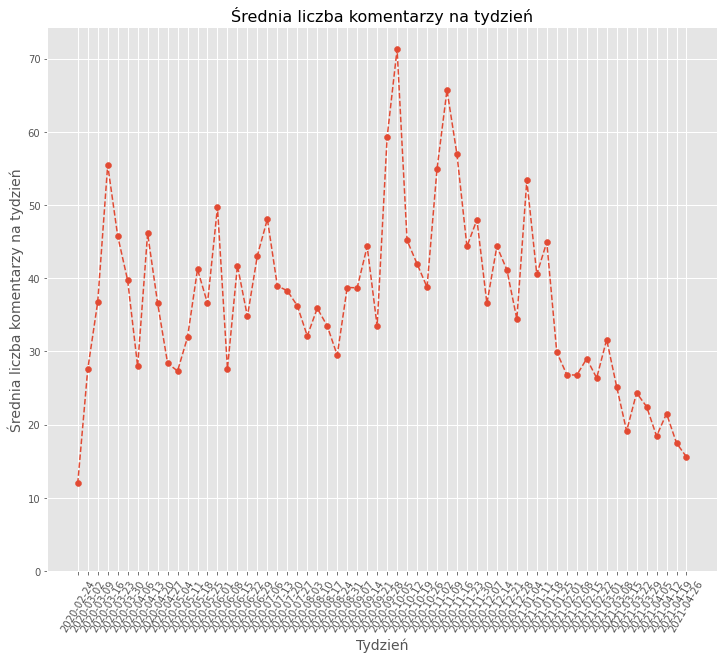

,Średnia liczba komentarzy na tydzień,Tydzień
0,15.59,2021-04-26
1,17.49,2021-04-19
2,21.51,2021-04-12
3,18.44,2021-04-05
4,22.47,2021-03-29
...,...,...
57,45.80,2020-03-23
58,55.47,2020-03-16
59,36.76,2020-03-09
60,27.56,2020-03-02


In [131]:
#  srednia ilosc komentarzy per tweet na tydzien

sql1 = """
select ROUND(AVG(t.reply_count)::numeric, 2) as "Średnia liczba komentarzy na tydzień",
       date_trunc('week', t.created_at)      as "Tydzień"
from tweet t
where t.type = 1
group by "Tydzień"
order by "Tydzień" desc;

"""

df1 = getAll(sql1)
plot(df1['Tydzień'], df1['Średnia liczba komentarzy na tydzień'], 'Tydzień', 'Średnia liczba komentarzy na tydzień', 'Średnia liczba komentarzy na tydzień', 'srednia-ilosc-komentarzy-per-tweet-na-tydzien.png')
df1


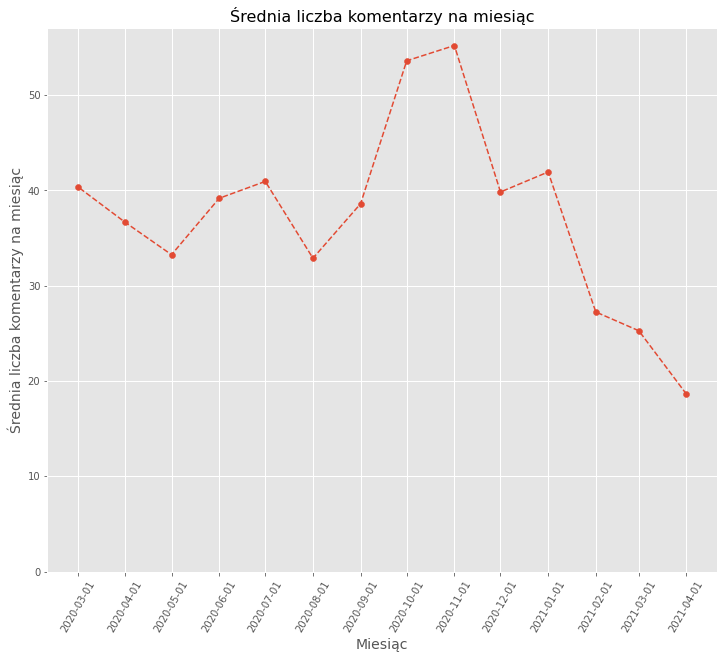

,Średnia liczba komentarzy na miesiąc,Miesiąc
0,18.62,2021-04-01
1,25.28,2021-03-01
2,27.25,2021-02-01
3,41.94,2021-01-01
4,39.84,2020-12-01
5,55.21,2020-11-01
6,53.61,2020-10-01
7,38.61,2020-09-01
8,32.89,2020-08-01
9,40.95,2020-07-01


In [132]:
# srednia ilosc komentarzy per tweet na miesiac

sql1 = """
select ROUND(AVG(t.reply_count)::numeric, 2) as "Średnia liczba komentarzy na miesiąc",
       date_trunc('month', t.created_at)     as "Miesiąc"
from tweet t
where t.type = 1
group by "Miesiąc"
order by "Miesiąc" desc;

"""

df1 = getAll(sql1)
plot(df1['Miesiąc'], df1['Średnia liczba komentarzy na miesiąc'], 'Miesiąc', 'Średnia liczba komentarzy na miesiąc', 'Średnia liczba komentarzy na miesiąc', 'srednia-ilosc-komentarzy-per-tweet-na-miesiac.png')
df1


In [133]:
# srednia ilosc retweetow per tweet na dzien

sql1 = """
select ROUND(AVG(t.retweet_count)::numeric, 2) as "Średnia liczba retweetow na dzien",
       date_trunc('day', t.created_at)         as "Dzień"
from tweet t
where t.type = 1
group by "Dzień"
order by "Dzień" desc;
"""

df1 = getAll(sql1)
# dfi.export(df1,"images/srednia-ilosc-retweetow-per-tweet-na-dzien.png", max_rows=-1)
df1


,Średnia liczba retweetow na dzien,Dzień
0,25.66,2021-04-29
1,60.90,2021-04-28
2,55.27,2021-04-27
3,64.57,2021-04-26
4,95.16,2021-04-25
...,...,...
420,95.53,2020-03-05
421,190.00,2020-03-04
422,129.55,2020-03-03
423,112.17,2020-03-02


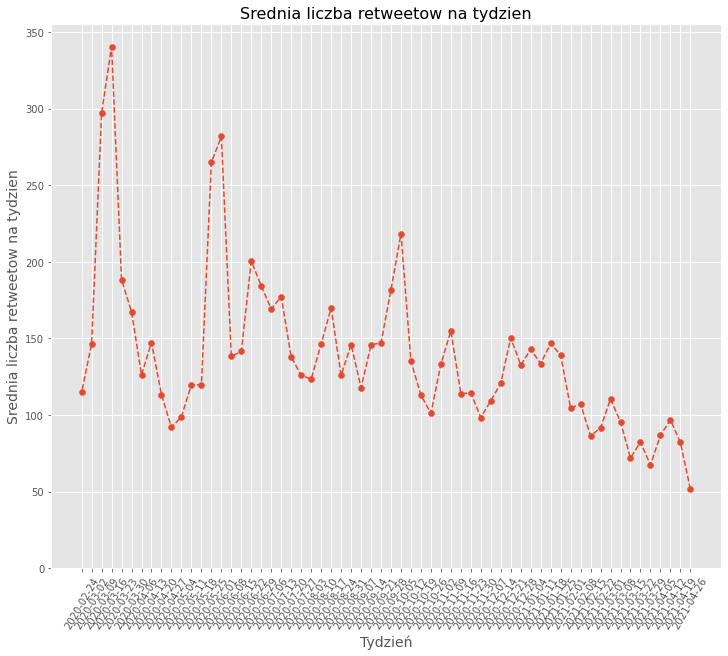

,Srednia liczba retweetow na tydzien,Tydzień
0,51.61,2021-04-26
1,82.02,2021-04-19
2,96.79,2021-04-12
3,86.73,2021-04-05
4,67.33,2021-03-29
...,...,...
57,188.33,2020-03-23
58,340.61,2020-03-16
59,297.23,2020-03-09
60,146.59,2020-03-02


In [134]:
# srednia ilosc retweetow per tweet na tydzien

sql1 = """
select ROUND(AVG(t.retweet_count)::numeric, 2) as "Srednia liczba retweetow na tydzien",
       date_trunc('week', t.created_at)        as "Tydzień"
from tweet t
where t.type = 1
group by "Tydzień"
order by "Tydzień" desc;

"""

df1 = getAll(sql1)
plot(df1['Tydzień'], df1['Srednia liczba retweetow na tydzien'], 'Tydzień', 'Srednia liczba retweetow na tydzien', 'Srednia liczba retweetow na tydzien', 'srednia-ilosc-retweetow-per-tweet-na-tydzien.png')
df1


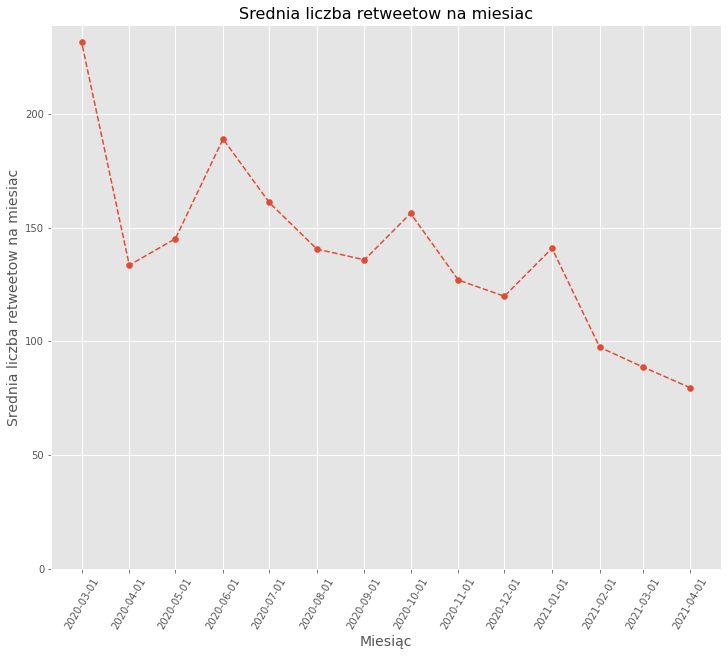

,Srednia liczba retweetow na miesiac,Miesiąc
0,79.54,2021-04-01
1,88.72,2021-03-01
2,97.37,2021-02-01
3,140.88,2021-01-01
4,119.76,2020-12-01
5,126.95,2020-11-01
6,156.23,2020-10-01
7,135.80,2020-09-01
8,140.53,2020-08-01
9,161.05,2020-07-01


In [135]:
# srednia ilosc retweetow per tweet na miesiac

sql1 = """
select ROUND(AVG(t.retweet_count)::numeric, 2) as "Srednia liczba retweetow na miesiac",
       date_trunc('month', t.created_at)       as "Miesiąc"
from tweet t
where t.type = 1
group by "Miesiąc"
order by "Miesiąc" desc;

"""

df1 = getAll(sql1)
plot(df1['Miesiąc'], df1['Srednia liczba retweetow na miesiac'], 'Miesiąc', 'Srednia liczba retweetow na miesiac', 'Srednia liczba retweetow na miesiac', 'srednia-ilosc-retweetow-per-tweet-na-miesiac.png')
df1


In [136]:
# srednia ilosc polubien per tweet na dzien

sql1 = """
select ROUND(AVG(t.favorite_count)::numeric, 2) as "Srednia liczba polubien na dzien",
       date_trunc('day', t.created_at)          as "Dzień"
from tweet t
where t.type = 1
group by "Dzień"
order by "Dzień" desc;
"""

df1 = getAll(sql1)
# dfi.export(df1,"images/srednia-ilosc-polubien-per-tweet-na-dzien.png", max_rows=-1)
df1


,Srednia liczba polubien na dzien,Dzień
0,134.76,2021-04-29
1,275.34,2021-04-28
2,261.52,2021-04-27
3,392.79,2021-04-26
4,451.00,2021-04-25
...,...,...
420,256.47,2020-03-05
421,655.01,2020-03-04
422,384.74,2020-03-03
423,391.64,2020-03-02


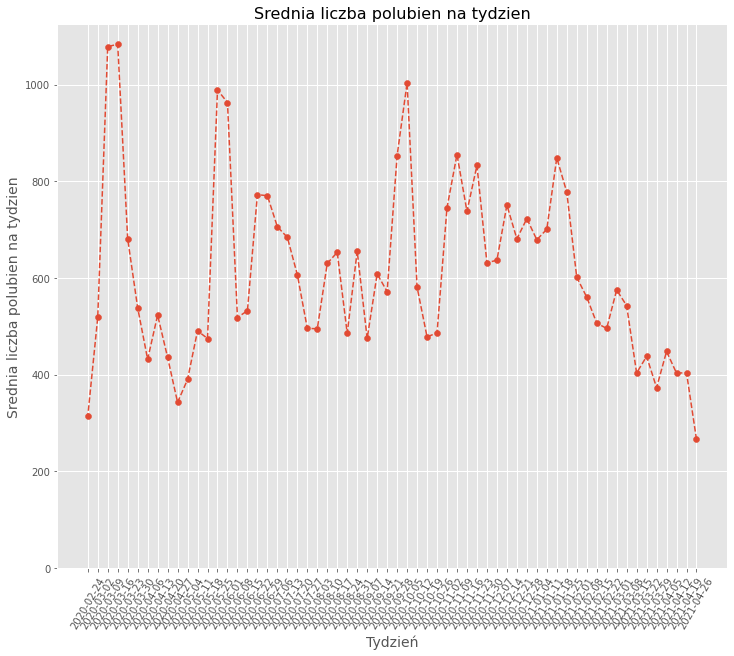

,Srednia liczba polubien na tydzien,Tydzień
0,266.19,2021-04-26
1,404.15,2021-04-19
2,403.31,2021-04-12
3,448.19,2021-04-05
4,373.35,2021-03-29
...,...,...
57,681.42,2020-03-23
58,1083.85,2020-03-16
59,1078.91,2020-03-09
60,518.73,2020-03-02


In [137]:
# srednia ilosc polubien per tweet na tydzien

sql1 = """
select ROUND(AVG(t.favorite_count)::numeric, 2) as "Srednia liczba polubien na tydzien",
       date_trunc('week', t.created_at)         as "Tydzień"
from tweet t
where t.type = 1
group by "Tydzień"
order by "Tydzień" desc;
"""

df1 = getAll(sql1)
plot(df1['Tydzień'], df1['Srednia liczba polubien na tydzien'], 'Tydzień', 'Srednia liczba polubien na tydzien', 'Srednia liczba polubien na tydzien', 'srednia-ilosc-polubien-per-tweet-na-tydzien.png')
df1


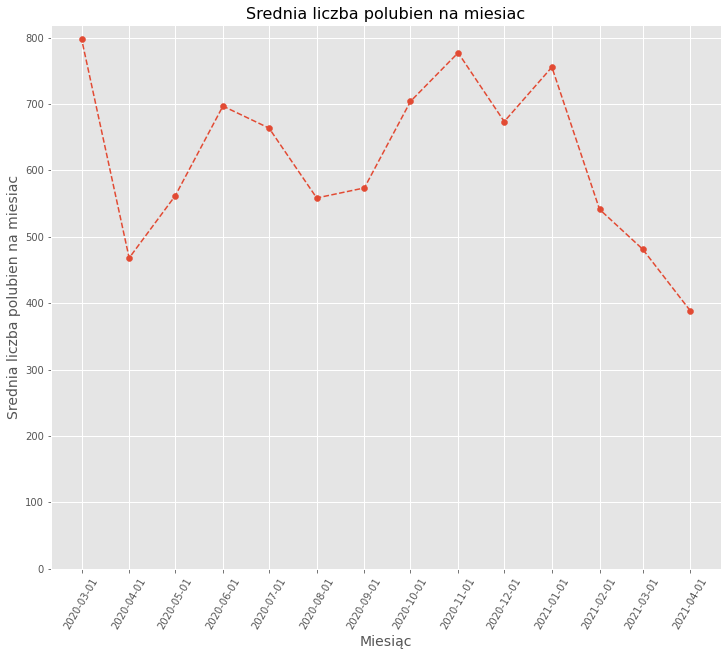

,Srednia liczba polubien na miesiac,Miesiąc
0,388.57,2021-04-01
1,481.37,2021-03-01
2,541.23,2021-02-01
3,755.44,2021-01-01
4,673.45,2020-12-01
5,777.10,2020-11-01
6,703.83,2020-10-01
7,573.50,2020-09-01
8,558.37,2020-08-01
9,663.61,2020-07-01


In [138]:
# srednia ilosc polubien per tweet na miesiac

sql1 = """
select ROUND(AVG(t.favorite_count)::numeric, 2) as "Srednia liczba polubien na miesiac",
       date_trunc('month', t.created_at)        as "Miesiąc"
from tweet t
where t.type = 1
group by "Miesiąc"
order by "Miesiąc" desc;

"""

df1 = getAll(sql1)
plot(df1['Miesiąc'], df1['Srednia liczba polubien na miesiac'], 'Miesiąc', 'Srednia liczba polubien na miesiac', 'Srednia liczba polubien na miesiac', 'srednia-ilosc-polubien-per-tweet-na-miesiac.png')
df1


In [139]:
# srednia ilosc cytowan per tweet na dzien

sql1 = """
select ROUND(AVG(t.quote_count)::numeric, 2) as "Srednia liczba cytowan na dzien",
       date_trunc('day', t.created_at)       as "Dzień"
from tweet t
where t.type = 1
group by "Dzień"
order by "Dzień" desc;

"""

df1 = getAll(sql1)
# dfi.export(df1,"images/srednia-ilosc-cytowan-per-tweet-na-dzien.png", max_rows=-1)
df1


,Srednia liczba cytowan na dzien,Dzień
0,5.47,2021-04-29
1,12.24,2021-04-28
2,30.75,2021-04-27
3,22.78,2021-04-26
4,18.02,2021-04-25
...,...,...
420,27.35,2020-03-05
421,31.59,2020-03-04
422,27.16,2020-03-03
423,38.13,2020-03-02


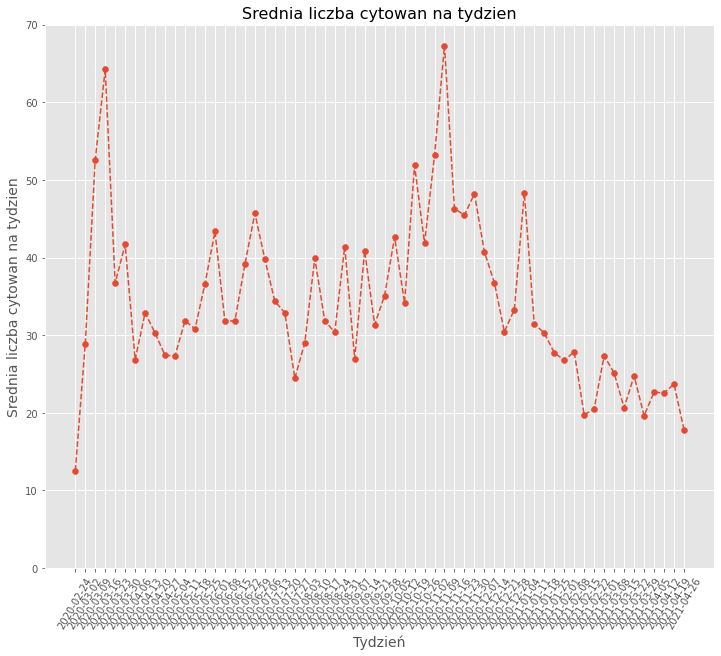

,Srednia liczba cytowan na tydzien,Tydzień
0,17.83,2021-04-26
1,23.69,2021-04-19
2,22.55,2021-04-12
3,22.66,2021-04-05
4,19.62,2021-03-29
...,...,...
57,36.73,2020-03-23
58,64.23,2020-03-16
59,52.59,2020-03-09
60,28.86,2020-03-02


In [140]:
# srednia ilosc cytowan per tweet na tydzien

sql1 = """
select ROUND(AVG(t.quote_count)::numeric, 2) as "Srednia liczba cytowan na tydzien",
       date_trunc('week', t.created_at)      as "Tydzień"
from tweet t
where t.type = 1
group by "Tydzień"
order by "Tydzień" desc;

"""

df1 = getAll(sql1)
plot(df1['Tydzień'], df1['Srednia liczba cytowan na tydzien'], 'Tydzień', 'Srednia liczba cytowan na tydzien', 'Srednia liczba cytowan na tydzien', 'srednia-ilosc-cytowan-per-tweet-na-tydzien.png')
df1


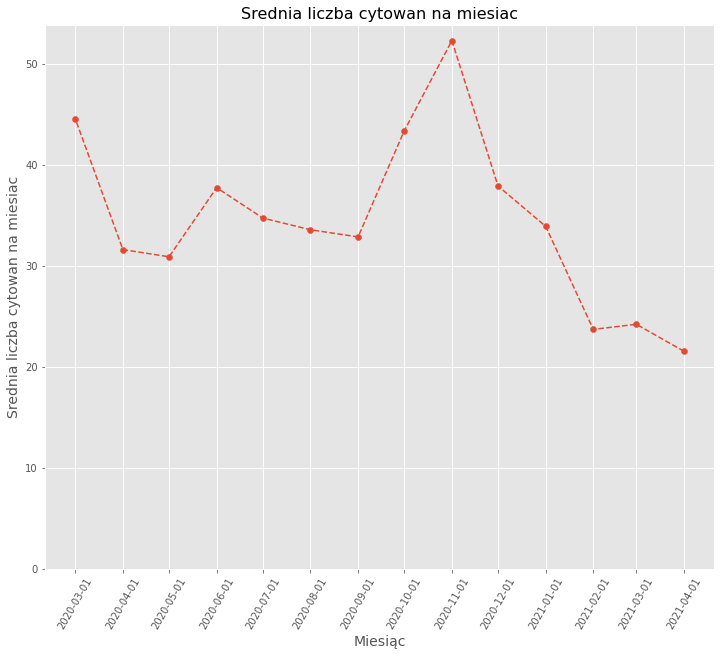

,Srednia liczba cytowan na miesiac,Miesiąc
0,21.55,2021-04-01
1,24.23,2021-03-01
2,23.72,2021-02-01
3,33.94,2021-01-01
4,37.94,2020-12-01
5,52.35,2020-11-01
6,43.40,2020-10-01
7,32.89,2020-09-01
8,33.60,2020-08-01
9,34.76,2020-07-01


In [141]:
# srednia ilosc cytowan per tweet na miesiac

sql1 = """
select ROUND(AVG(t.quote_count)::numeric, 2) as "Srednia liczba cytowan na miesiac",
       date_trunc('month', t.created_at)     as "Miesiąc"
from tweet t
where t.type = 1
group by "Miesiąc"
order by "Miesiąc" desc;

"""

df1 = getAll(sql1)
plot(df1['Miesiąc'], df1['Srednia liczba cytowan na miesiac'], 'Miesiąc', 'Srednia liczba cytowan na miesiac', 'Srednia liczba cytowan na miesiac', 'srednia-ilosc-cytowan-per-tweet-na-miesiac.png')
df1


In [142]:
# srednia ilosc pozytywnych komentarzy per tweet

sql1 = """
select ROUND(avg(count)::numeric, 2) as "Średnia liczba pozytywnych komentarzy na tweet"
from (select count(*) as count
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound >= 0.05
      group by t.id
      order by count desc) as counts;

"""

df1 = getAll(sql1)
# dfi.export(df1,"images/srednia-ilosc-pozytywnych-komentarzy-per-tweet.png")
df1


,Średnia liczba pozytywnych komentarzy na tweet
0,15.66


In [143]:
# srednia ilosc negatywnych komentarzy per tweet

sql1 = """
select ROUND(avg(count)::numeric, 2) "Średnia liczba negatywnych komentarzy na tweet"
from (select count(*) as count
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound <= -0.05
      group by t.id
      order by count desc) as counts;

"""

df1 = getAll(sql1)
# dfi.export(df1,"images/srednia-ilosc-negatywnych-komentarzy-per-tweet.png")
df1


,Średnia liczba negatywnych komentarzy na tweet
0,14.64


In [144]:
# srednia ilosc pozytywnych komentarzy per tweet per dzien

sql1 = """
select ROUND(avg(count)::numeric, 2) as "Średnia liczba pozytywnych komentarzy na tweet", day as "Dzień"
from (select count(*) as count, date_trunc('day', t.created_at) as day
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound >= 0.05
      group by t.id, day
      order by count desc) as res
group by day;
"""

df1 = getAll(sql1)
# dfi.export(df1,"images/srednia-ilosc-pozytywnych-komentarzy-per-tweet-per-dzien.png", max_rows=-1)
df1


,Średnia liczba pozytywnych komentarzy na tweet,Dzień
0,31.83,2020-03-01
1,19.89,2020-03-02
2,44.86,2020-03-03
3,11.00,2020-03-04
4,21.63,2020-03-05
...,...,...
412,6.00,2021-04-25
413,20.00,2021-04-26
414,59.20,2021-04-27
415,1.00,2021-04-28


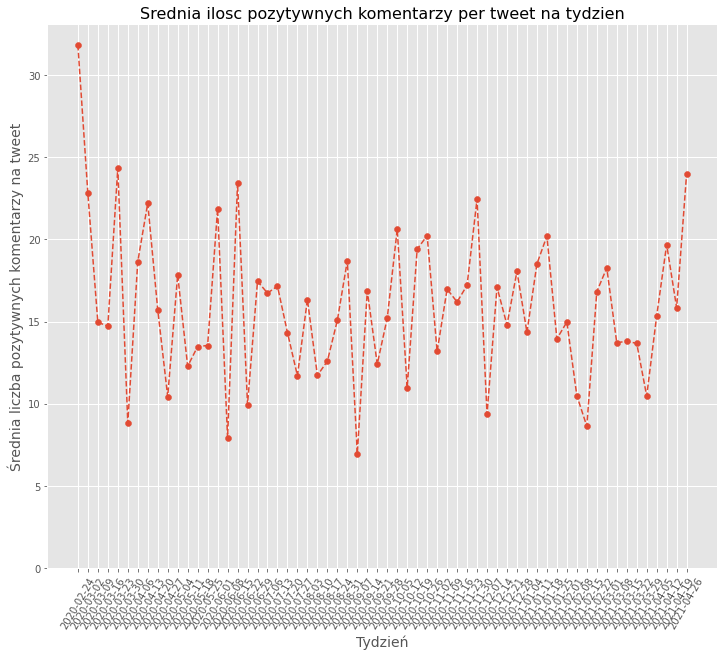

,Średnia liczba pozytywnych komentarzy na tweet,Tydzień
0,31.83,2020-02-24
1,22.79,2020-03-02
2,14.95,2020-03-09
3,14.73,2020-03-16
4,24.33,2020-03-23
...,...,...
57,10.47,2021-03-29
58,15.34,2021-04-05
59,19.68,2021-04-12
60,15.84,2021-04-19


In [145]:
# srednia ilosc pozytywnych komentarzy per tweet per tydzien

sql1 = """
select ROUND(avg(count)::numeric, 2) as "Średnia liczba pozytywnych komentarzy na tweet", week as "Tydzień"
from (select count(*) as count, date_trunc('week', t.created_at) as week
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound >= 0.05
      group by t.id, week
      order by count desc) as res
group by week;
"""

df1 = getAll(sql1)
plot(df1['Tydzień'], df1['Średnia liczba pozytywnych komentarzy na tweet'], 'Tydzień', 'Średnia liczba pozytywnych komentarzy na tweet', 'Srednia ilosc pozytywnych komentarzy per tweet na tydzien', 'srednia-ilosc-pozytywnych-komentarzy-per-tweet-per-tydzien.png')
df1


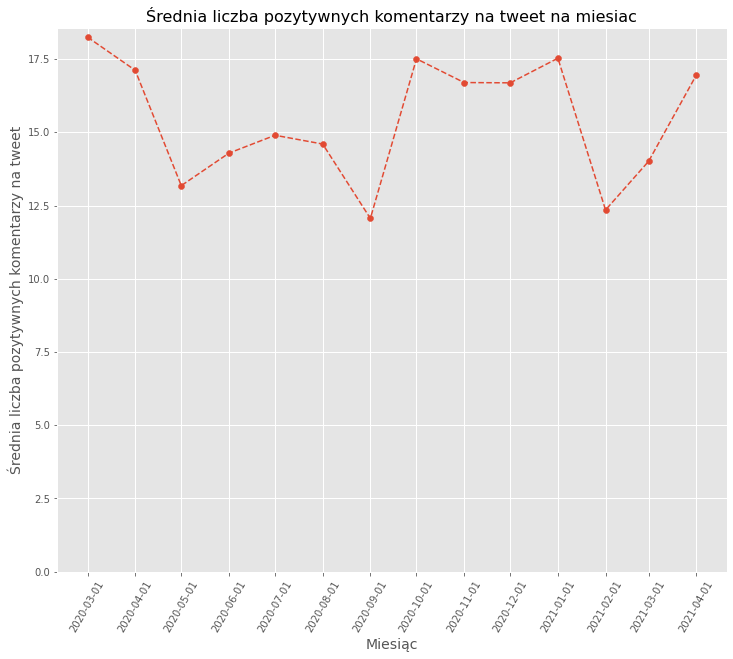

,Średnia liczba pozytywnych komentarzy na tweet,Miesiąc
0,18.25,2020-03-01
1,17.12,2020-04-01
2,13.18,2020-05-01
3,14.29,2020-06-01
4,14.90,2020-07-01
5,14.60,2020-08-01
6,12.06,2020-09-01
7,17.51,2020-10-01
8,16.70,2020-11-01
9,16.69,2020-12-01


In [146]:
# srednia ilosc pozytywnych komentarzy per tweet per miesiac

sql1 = """
select ROUND(avg(count)::numeric, 2) as "Średnia liczba pozytywnych komentarzy na tweet", month as "Miesiąc"
from (select count(*) as count, date_trunc('month', t.created_at) as month
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound >= 0.05
      group by t.id, month
      order by count desc) as res
group by month;

"""

df1 = getAll(sql1)
plot(df1['Miesiąc'], df1['Średnia liczba pozytywnych komentarzy na tweet'], 'Miesiąc', 'Średnia liczba pozytywnych komentarzy na tweet', 'Średnia liczba pozytywnych komentarzy na tweet na miesiac', 'srednia-ilosc-pozytywnych-komentarzy-per-tweet-per-miesiac.png')
df1


In [147]:
# srednia ilosc negatywnych komentarzy per tweet per dzien

sql1 = """
select ROUND(avg(count)::numeric, 2) as "Średnia liczba negatywnych komentarzy na tweet", day as "Dzień"
from (select count(*) as count, date_trunc('day', t.created_at) as day
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound <= -0.05
      group by t.id, day
      order by count desc) as res
group by day;
"""

df1 = getAll(sql1)
# dfi.export(df1,"images/srednia-ilosc-negatywnych-komentarzy-per-tweet-per-dzien.png", max_rows=-1)
df1


,Średnia liczba negatywnych komentarzy na tweet,Dzień
0,23.22,2020-03-01
1,25.63,2020-03-02
2,20.50,2020-03-03
3,11.00,2020-03-04
4,20.25,2020-03-05
...,...,...
408,2.00,2021-04-25
409,17.67,2021-04-26
410,45.40,2021-04-27
411,1.50,2021-04-28


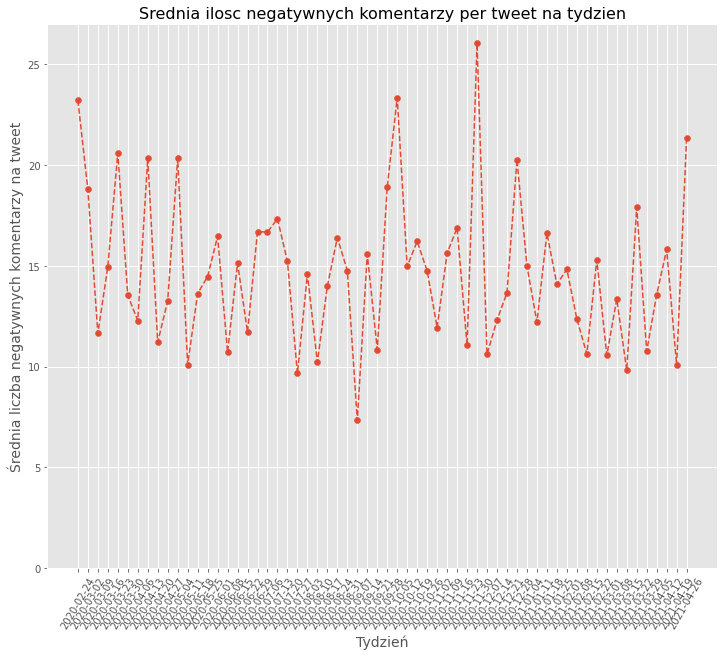

,Średnia liczba negatywnych komentarzy na tweet,Tydzień
0,23.22,2020-02-24
1,18.80,2020-03-02
2,11.65,2020-03-09
3,14.97,2020-03-16
4,20.60,2020-03-23
...,...,...
57,10.77,2021-03-29
58,13.57,2021-04-05
59,15.82,2021-04-12
60,10.06,2021-04-19


In [148]:
# srednia ilosc negatywnych komentarzy per tweet per tydzien

sql1 = """
select ROUND(avg(count)::numeric, 2) as "Średnia liczba negatywnych komentarzy na tweet", week as "Tydzień"
from (select count(*) as count, date_trunc('week', t.created_at) as week
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound <= -0.05
      group by t.id, week
      order by count desc) as res
group by week;

"""

df1 = getAll(sql1)
plot(df1['Tydzień'], df1['Średnia liczba negatywnych komentarzy na tweet'], 'Tydzień', 'Średnia liczba negatywnych komentarzy na tweet', 'Srednia ilosc negatywnych komentarzy per tweet na tydzien', 'srednia-ilosc-negatywnych-komentarzy-per-tweet-per-tydzien.png')
df1


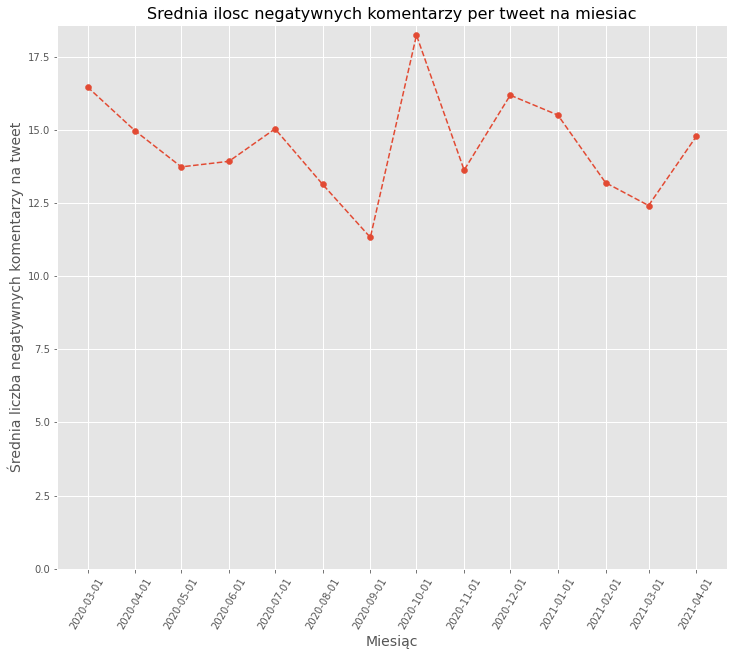

,Średnia liczba negatywnych komentarzy na tweet,Miesiąc
0,16.46,2020-03-01
1,14.96,2020-04-01
2,13.73,2020-05-01
3,13.92,2020-06-01
4,15.03,2020-07-01
5,13.13,2020-08-01
6,11.32,2020-09-01
7,18.23,2020-10-01
8,13.62,2020-11-01
9,16.18,2020-12-01


In [149]:
# srednia ilosc negatywnych komentarzy per tweet per miesiac

sql1 = """
select ROUND(avg(count)::numeric, 2) as "Średnia liczba negatywnych komentarzy na tweet", month as "Miesiąc"
from (select count(*) as count, date_trunc('month', t.created_at) as month
      from tweet t
               join tweet t2 on t.id = t2.reply_to
      where t.type = 1
        and t2.type = 2
        and t2.sentiment_compound <= -0.05
      group by t.id, month
      order by count desc) as res
group by month;
"""


df1 = getAll(sql1)
plot(df1['Miesiąc'], df1['Średnia liczba negatywnych komentarzy na tweet'], 'Miesiąc', 'Średnia liczba negatywnych komentarzy na tweet', 'Srednia ilosc negatywnych komentarzy per tweet na miesiac', 'srednia-ilosc-negatywnych-komentarzy-per-tweet-per-miesiac.png')
df1
